In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
mnist=fetch_openml('mnist_784')

In [34]:
X=mnist.data
y=mnist.target
X.shape

(70000, 784)

In [28]:
np.unique(y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [29]:
pd.Series(y).value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
dtype: int64

In [38]:
idx=(y=='0')|(y=='3')
X_new=X[idx]
y_new=y[idx]

In [41]:
X_new.shape

(14044, 784)

In [42]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_new,y_new,test_size=.2,random_state=1)

In [43]:
xtrain.max()

255.0

In [44]:
xtrain=xtrain/255.0
xtest=xtest/255.0

In [45]:
xtrain.max()

1.0

In [46]:
from sklearn.decomposition import PCA
pca=PCA(0.94)

In [47]:
pca_train=pca.fit_transform(xtrain)
pca_test=pca.transform(xtest)

In [48]:
pca_train.shape

(11235, 113)

In [52]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C=.01)
log.fit(pca_train,ytrain)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
log.score(pca_test,ytest)

0.9932360270558918

In [71]:
!pip install opencv-python

In [73]:
import cv2

In [97]:
img=cv2.imread('t1.png',0)
img.ndim

2

In [98]:
img.shape

(100, 105)

In [99]:
test=cv2.resize(img,(28,28))

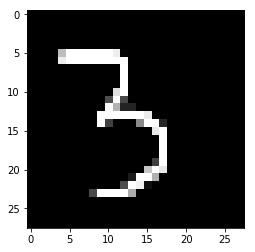

In [100]:
plt.imshow(test,cmap='gray')

In [101]:
test=test/255.0
test.shape

(28, 28)

In [102]:
test = test.reshape(1,-1)

In [103]:
test.shape

(1, 784)

In [104]:
test.max()

1.0

In [105]:
test1 = pca.transform(test)

In [106]:
test1.shape

(1, 113)

In [107]:
log.predict(test1)

array(['3'], dtype=object)

In [108]:
for i in [.0001,.001,.01,.1,10,100]:
    log = LogisticRegression(C=i)
    log.fit(pca_train,ytrain)
    print(log.predict(test1))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


['3']
['3']


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


['3']


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


['3']


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


['3']


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


['3']
